<a href="https://colab.research.google.com/github/cccg8105/notebook_AD/blob/master/Frecuencia%20inscripciones/Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Analisis de la frecuencia de inscripciones



In [87]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose

raw_csv_data = pd.read_csv("https://raw.githubusercontent.com/cccg8105/notebook_AD/master/Frecuencia%20inscripciones/data/conversionesPE.csv", index_col=0)


In [88]:
raw_csv_data.head()

,FechaConsultora,FuenteIngreso,cantidad,Pais
1,26/08/19,MovilGZ,33,Perú
2,10/03/19,CALL CENTER,1,Perú
3,04/11/19,MovilGZ,30,Perú
4,13/02/19,UB,31,Perú
5,04/11/19,CALL CENTER,4,Perú


In [89]:
raw_csv_data.describe()

,cantidad
count,3846.000000
mean,88.921477
std,162.569807
min,1.000000
25%,3.000000
50%,18.000000
75%,54.750000
max,922.000000


In [90]:
df = raw_csv_data.copy()
df=df[df.FuenteIngreso == "UB"]
df['Fecha'] = pd.to_datetime(raw_csv_data.FechaConsultora, dayfirst = True)
df.set_index("Fecha", inplace=True)
df['inscripciones'] = df.cantidad
df=df.fillna(method='ffill')
del df['FuenteIngreso']
del df['Pais']
del df['FechaConsultora']
del df['cantidad']
df.head()

,inscripciones
Fecha,
2019-02-13,31
2019-01-30,36
2019-11-27,42
2019-11-15,32
2019-11-24,1


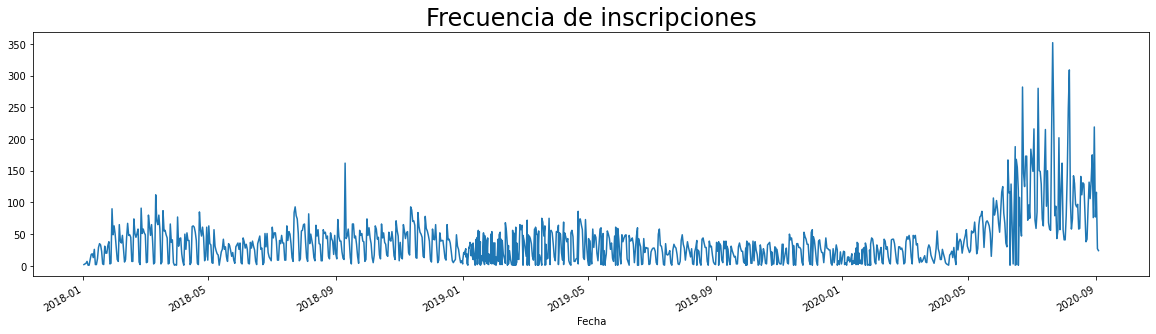

In [91]:
df.inscripciones.plot(figsize = (20,5))
plt.title("Frecuencia de inscripciones", size= 24)
plt.show()
#df.head()

In [92]:
sts.adfuller(df.inscripciones)

(-6.99210755137138,
 7.697571928031726e-10,
 14,
 1054,
 {'1%': -3.4365694473419928,
  '10%': -2.568232111086707,
  '5%': -2.8642860655788693},
 10612.556419552802)

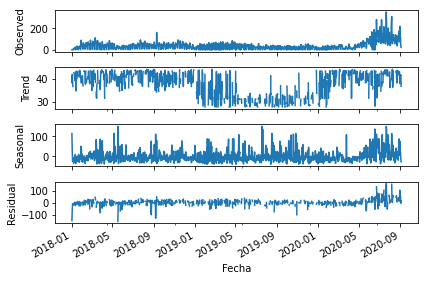

In [93]:
s_dec_additive = seasonal_decompose(df.inscripciones, "additive", freq=365)
s_dec_additive.plot()
plt.show()

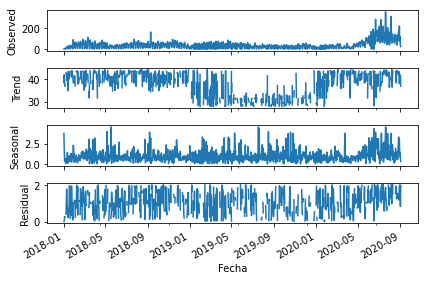

In [95]:
s_dec_additive = seasonal_decompose(df.inscripciones, "multiplicative", freq=365)
s_dec_additive.plot()
plt.show()